In [125]:
%%javascript

window.load_remote_theme = false
var theme_url = "https://drostehk.github.io/ipynb-theme/";
var asset_url = 'https://raw.githubusercontent.com/tijptjik/DS_assets/master/';

window.load_local_theme = function(){
    var hostname = document.location.hostname
    return ((hostname == "localhost" || hostname == '127.0.0.1') && !load_remote_theme)
}

var url = load_local_theme() ? document.location.origin + "/files/theme/custom.js" : theme_url + 'custom.js'

$.getScript(url)

<IPython.core.display.Javascript object>

# Income Inequality in the USA

# We are analyzing economic data to see if there has been a growing income inequality in the USA

# In our dataset, we had data on quantiles of the distributions of family incomes in the United States. It combined three data sources:

# (1) US Census Table F-1 for the central quantiles

# (2) Piketty and Saez for the 95th and higher quantiles. [Smart Economist Guys]

# (3) Gross Domestic Product and implicit price deflators from MeasuringWorth.com

### Deliverables


* Exploratory Data Analysis

* Motivation for feature selection

* Checking whether the preconditions for linear regression have been met

* Evaluation of model's strengths and weaknesses


# EDA

In [2]:
# Import the libraries and modules you need

# from ggplot import *
# import pandas as pd
# import numpy as np
# from random import sample

# %matplotlib inline


from ggplot import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab 
%matplotlib inline


In [3]:
# Import our dataset into RAM into a variable. 

income = pd.read_csv("incomeinequality.csv")

In [4]:
# Check if any null stuff. Yesr is the column heading. AKA 'feature'

pd.isnull(income.Year)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
...
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
Name: Year, Length: 66, dtype: bool

In [5]:
# Get some info on your dataset

income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 23 columns):
Unnamed: 0          66 non-null int64
Year                66 non-null int64
Number.thousands    66 non-null int64
quintile1           66 non-null int64
quintile2           66 non-null int64
median              66 non-null float64
quintile3           66 non-null int64
quintile4           66 non-null int64
p95                 66 non-null int64
P90                 66 non-null int64
P95                 66 non-null int64
P99                 66 non-null int64
P99.5               66 non-null int64
P99.9               66 non-null int64
P99.99              66 non-null int64
realGDP.M           66 non-null float64
GDP.Deflator        66 non-null float64
PopulationK         66 non-null int64
realGDPperCap       66 non-null float64
P95IRSvsCensus      66 non-null float64
personsPerFamily    66 non-null float64
realGDPperFamily    66 non-null float64
mean.median         66 non-null float64
dtypes:

In [6]:
# See some high level details on the data

income.describe()

,Unnamed: 0,Year,Number.thousands,quintile1,quintile2,median,quintile3,quintile4,p95,P90,...,P99.9,P99.99,realGDP.M,GDP.Deflator,PopulationK,realGDPperCap,P95IRSvsCensus,personsPerFamily,realGDPperFamily,mean.median
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,67.500000,1979.500000,59379.136364,25038.212121,42777.545455,51276.052140,61500.454545,88610.378788,146542.227273,89723.318182,...,998977.500000,4480481.393939,7733636.466667,48.632424,228259.318182,31306.361297,0.831358,3.849922,120230.311789,2.281702
std,19.196354,19.196354,13173.216881,5424.794282,9700.414918,12591.698735,16307.996821,26382.681038,49604.881569,22474.365454,...,502565.894913,3155025.240421,4460743.446983,30.843849,49407.843119,12186.297220,0.071261,0.071617,46328.291293,0.400189
min,35.000000,1947.000000,37237.000000,13007.000000,22221.000000,25809.279668,29977.000000,42196.000000,67996.000000,41477.000000,...,465173.000000,1400826.000000,2034673.760000,12.900000,144126.000000,14117.323879,0.731960,3.722238,53623.132473,1.845679
25%,51.250000,1963.250000,47644.000000,20492.000000,34484.750000,40359.866228,47236.000000,65555.750000,100057.500000,73590.000000,...,612491.250000,1921803.500000,3757205.295000,18.200000,189956.750000,19777.076727,0.763734,3.798983,78853.806983,1.955526
50%,67.500000,1979.500000,59929.500000,27511.000000,46140.000000,54862.566967,65094.000000,91970.000000,146697.000000,94248.000000,...,738316.000000,2955926.000000,6774510.130000,42.645000,226416.000000,29620.622243,0.817871,3.844766,112961.208850,2.096274
75%,83.750000,1995.750000,70080.000000,28591.250000,49719.750000,60866.581015,74152.750000,109339.250000,186140.500000,105095.000000,...,1324485.500000,6696022.500000,10976747.805000,76.435000,268932.500000,40813.730027,0.890555,3.890913,156624.146799,2.576514
max,100.000000,2012.000000,80944.000000,32000.000000,54827.000000,67480.379800,83054.000000,124734.000000,218395.000000,121396.000000,...,2273381.000000,12708323.000000,16245782.070000,105.010000,314278.000000,51781.019056,0.989248,4.006411,200703.957526,3.251285


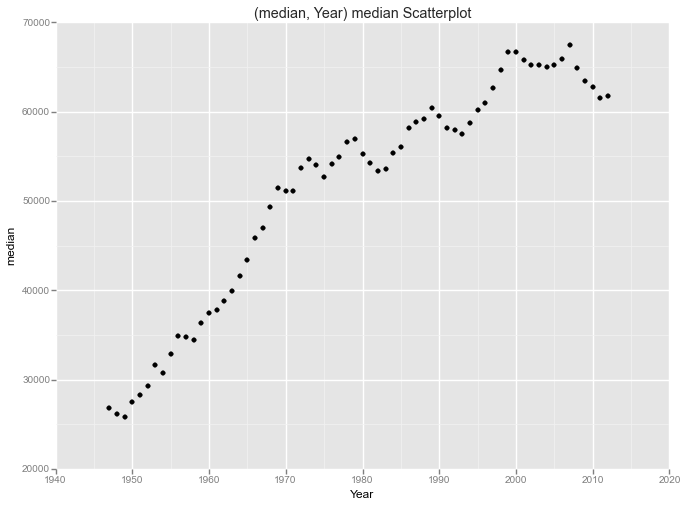

<ggplot: (272605105)>

In [7]:
ggplot(income, aes(x = 'Year', y = 'median')) + \
    geom_point() + \
    ggtitle("(median, Year) median Scatterplot")

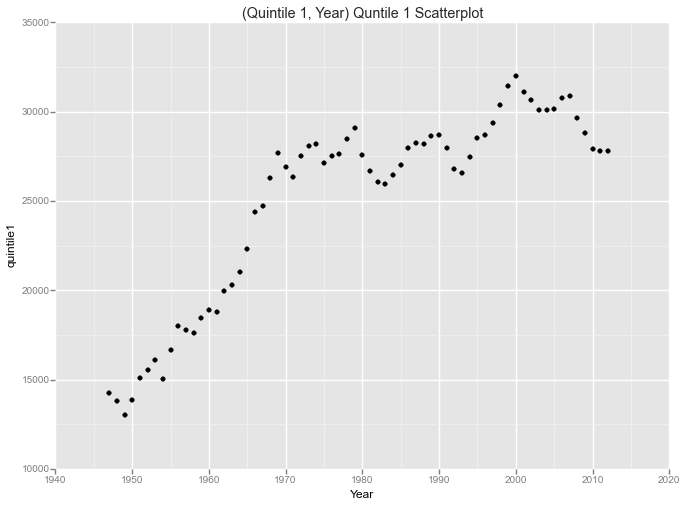

<ggplot: (274794001)>

In [8]:
ggplot(income, aes(x = 'Year', y = 'quintile1')) + \
    geom_point() + \
    ggtitle("(Quintile 1, Year) Quntile 1 Scatterplot")


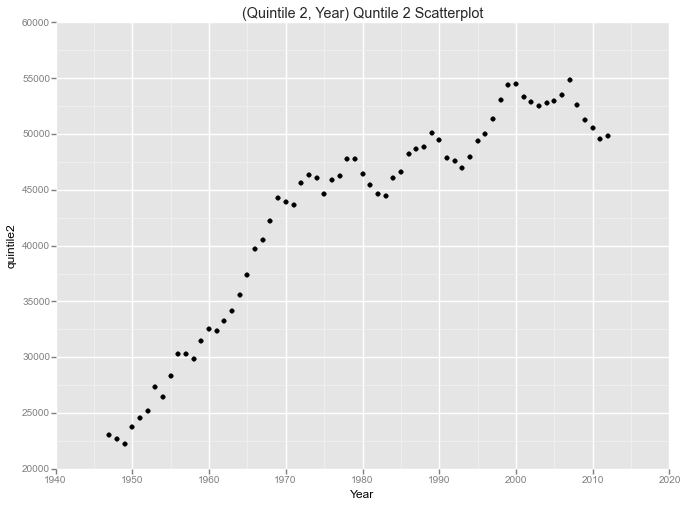

<ggplot: (285446533)>

In [9]:
ggplot(income, aes(x = 'Year', y = 'quintile2')) + \
    geom_point() + \
    ggtitle("(Quintile 2, Year) Quntile 2 Scatterplot")

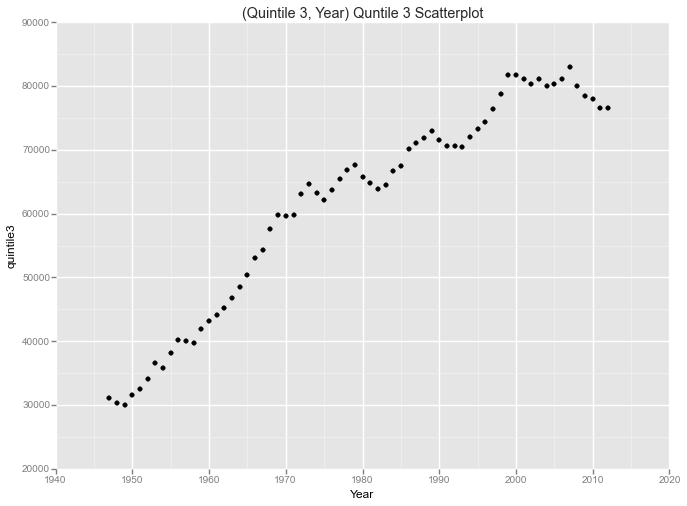

<ggplot: (285555661)>

In [10]:
ggplot(income, aes(x = 'Year', y = 'quintile3')) + \
    geom_point() + \
    ggtitle("(Quintile 3, Year) Quntile 3 Scatterplot")

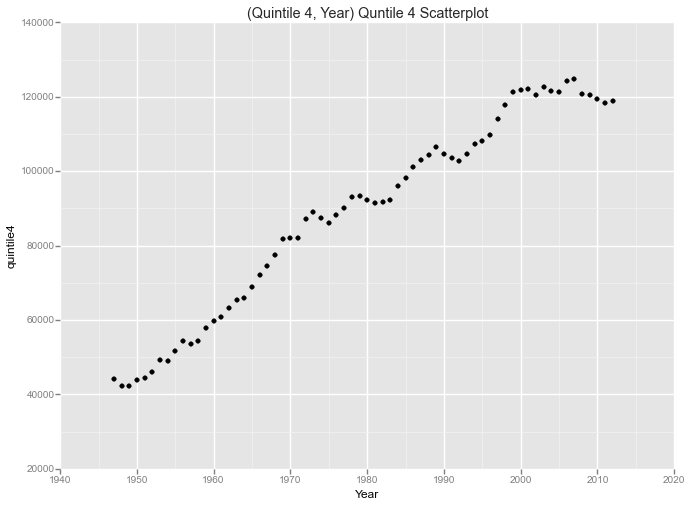

<ggplot: (285790749)>

In [11]:
ggplot(income, aes(x = 'Year', y = 'quintile4')) + \
    geom_point() + \
    ggtitle("(Quintile 4, Year) Quntile 4 Scatterplot")

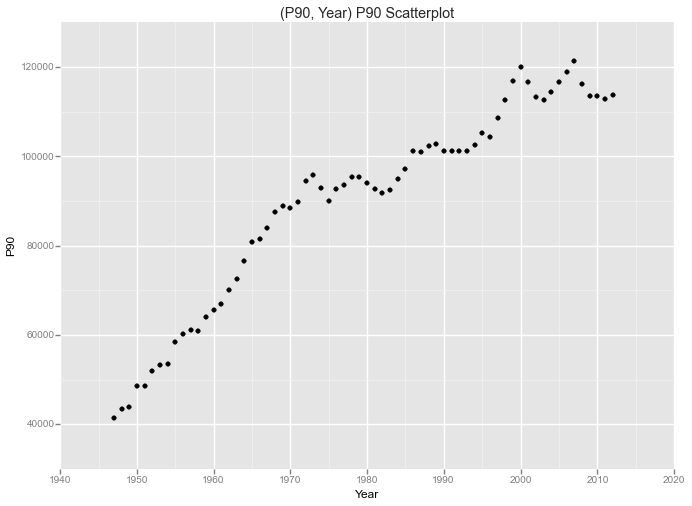

<ggplot: (285255145)>

In [12]:
ggplot(income, aes(x = 'Year', y = 'P90')) + \
    geom_point() + \
    ggtitle("(P90, Year) P90 Scatterplot")

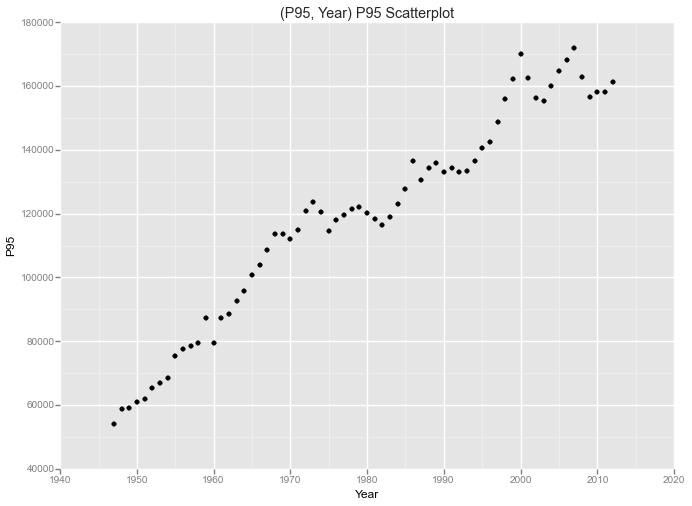

<ggplot: (287553401)>

In [13]:
ggplot(income, aes(x = 'Year', y = 'P95')) + \
    geom_point() + \
    ggtitle("(P95, Year) P95 Scatterplot")

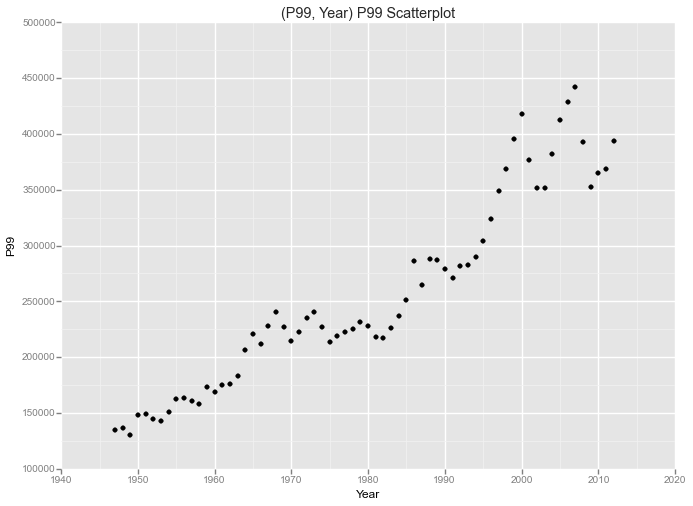

<ggplot: (287906977)>

In [14]:
ggplot(income, aes(x = 'Year', y = 'P99')) + \
    geom_point() + \
    ggtitle("(P99, Year) P99 Scatterplot")

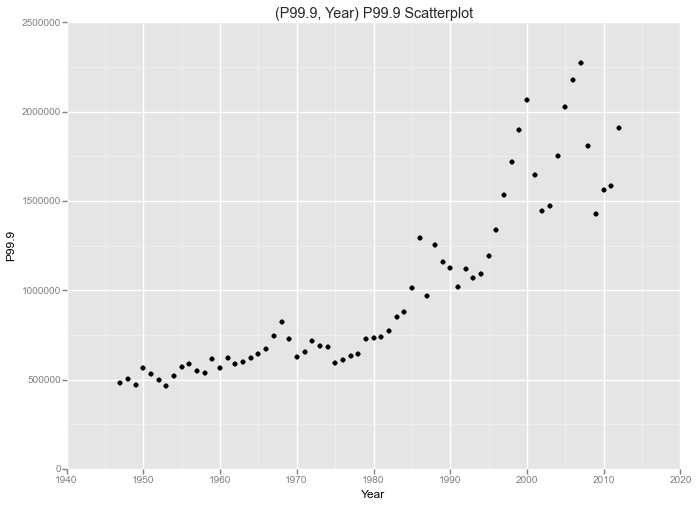

<ggplot: (285305729)>

In [15]:
ggplot(income, aes(x = 'Year', y = 'P99.9')) + \
    geom_point() + \
    ggtitle("(P99.9, Year) P99.9 Scatterplot")

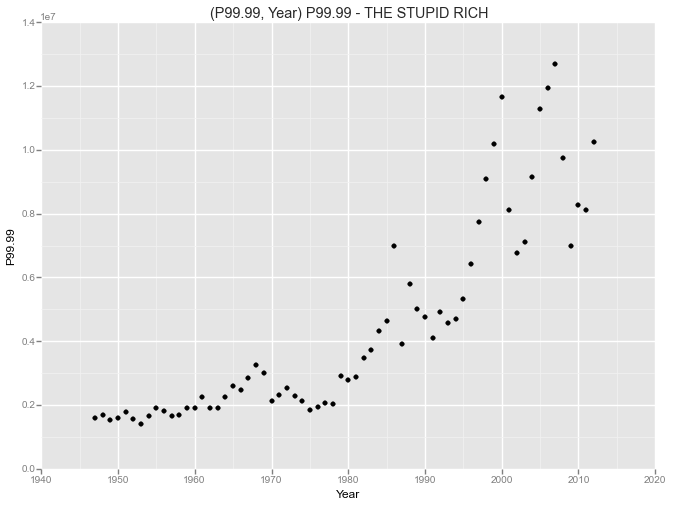

<ggplot: (285305769)>

In [16]:
ggplot(income, aes(x = 'Year', y = 'P99.99')) + \
    geom_point() + \
    ggtitle("(P99.99, Year) P99.99 - THE STUPID RICH")

* Real GDP Per Capita




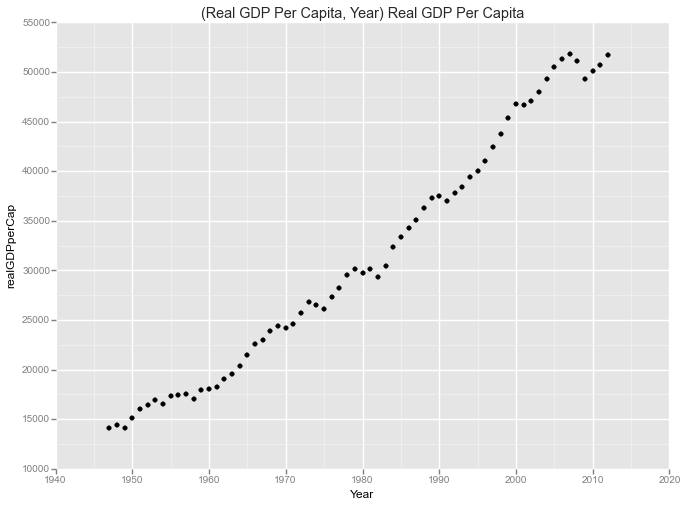

<ggplot: (287906993)>

In [17]:
ggplot(income, aes(x = 'Year', y = 'realGDPperCap')) + \
    geom_point() + \
    ggtitle("(Real GDP Per Capita, Year) Real GDP Per Capita")

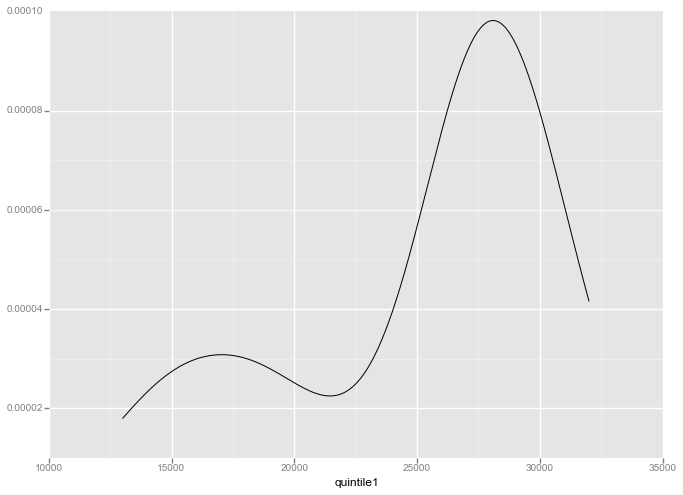

<ggplot: (285658353)>

In [18]:
ggplot(income, aes(x='quintile1')) + geom_density()

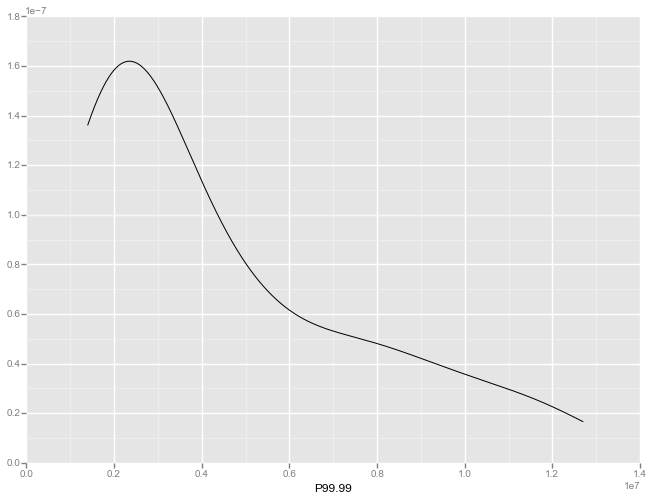

<ggplot: (285657725)>

In [19]:
ggplot(income, aes(x='P99.99')) + geom_density()

/Users/roshchan87/anaconda/lib/python2.7/site-packages/pandas/util/decorators.py:53: FutureWarning: rows is deprecated, use index instead
  warnings.warn(msg, FutureWarning)


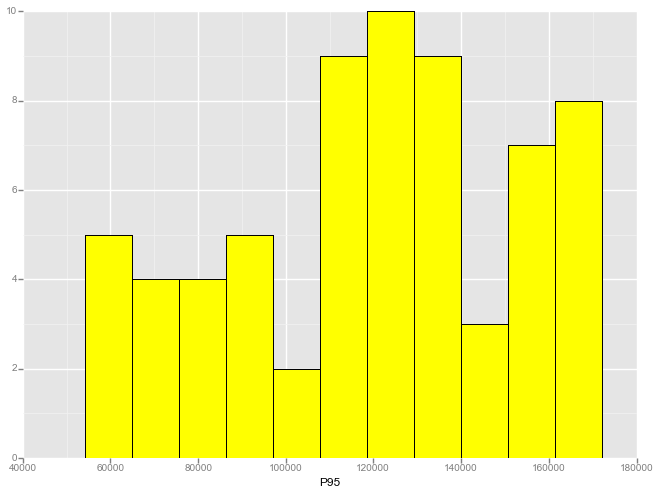

<ggplot: (285436345)>

In [20]:
ggplot(income, aes(x='P95')) + geom_histogram(binwidth=10000, colour="black", fill="yellow")

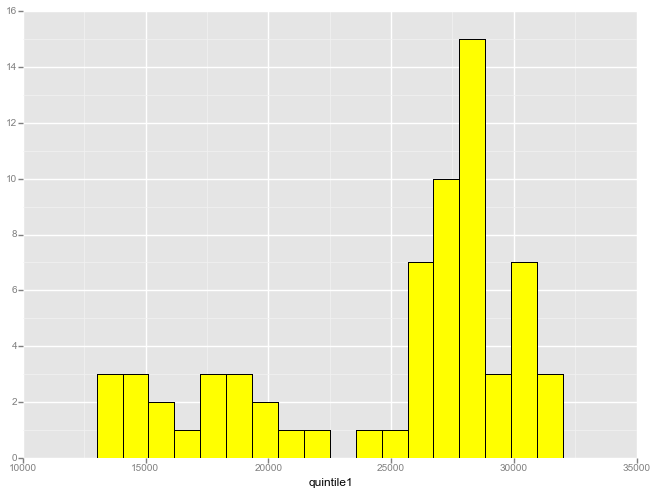

<ggplot: (284951005)>

In [21]:
ggplot(income, aes(x='quintile1')) + geom_histogram(binwidth=1000, colour="black", fill="yellow")

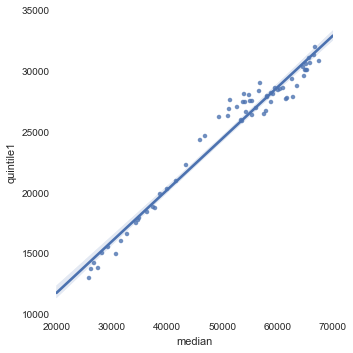

In [22]:
sns.lmplot("median", "quintile1", income);

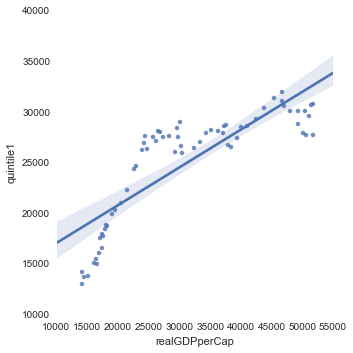

In [23]:
sns.lmplot("realGDPperCap","quintile1", income);

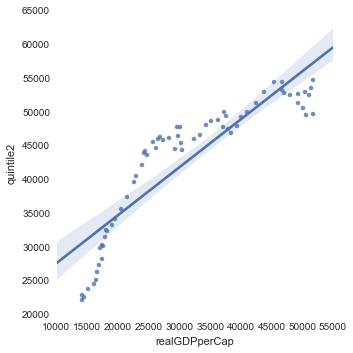

In [24]:
sns.lmplot("realGDPperCap", "quintile2", income);

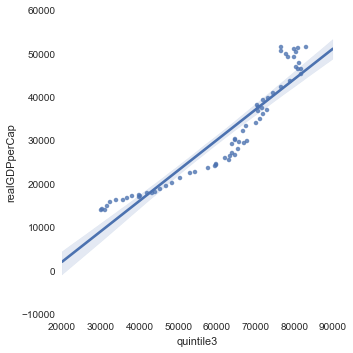

In [25]:
sns.lmplot("quintile3", "realGDPperCap", income);

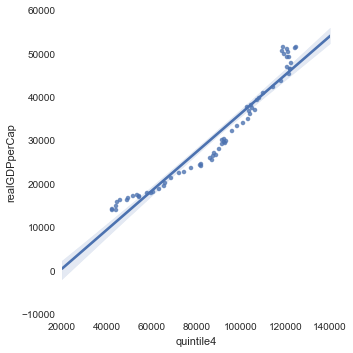

In [26]:
sns.lmplot("quintile4", "realGDPperCap", income);

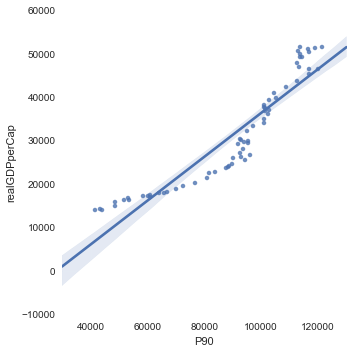

In [27]:
sns.lmplot("P90", "realGDPperCap", income);

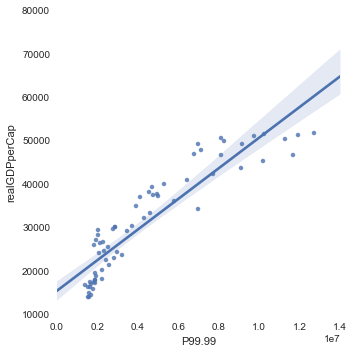

In [28]:
sns.lmplot("P99.99", "realGDPperCap", income);

# Checking whether the preconditions for linear regression have been met
* Regression assumes that variables have normal distributions. Non-normally distributed variables (highly skewed or kurtotic variables, or variables with substantial outliers) can distort relationships and significance tests.

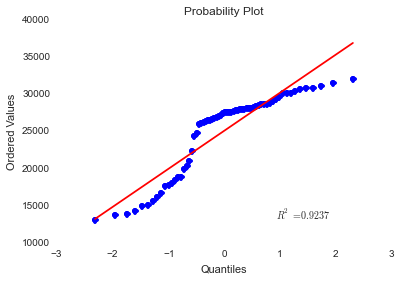

In [29]:
quintile1 = income['quintile1']
stats.probplot(quintile1, dist="norm", plot=pylab)
pylab.show()

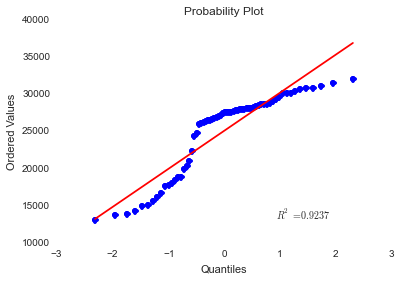

In [30]:
quintile2 = income['quintile2']
stats.probplot(quintile1, dist="norm", plot=pylab)
pylab.show()

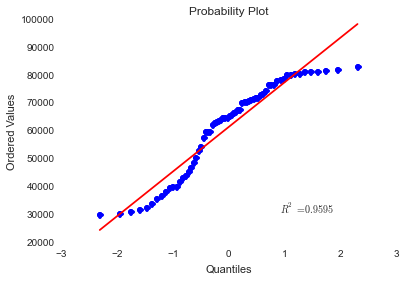

In [31]:
quintile3 = income['quintile3']
stats.probplot(quintile3, dist="norm", plot=pylab)
pylab.show()

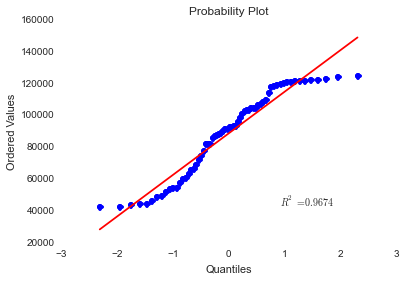

In [32]:
quintile4 = income['quintile4']
stats.probplot(quintile4, dist="norm", plot=pylab)
pylab.show()

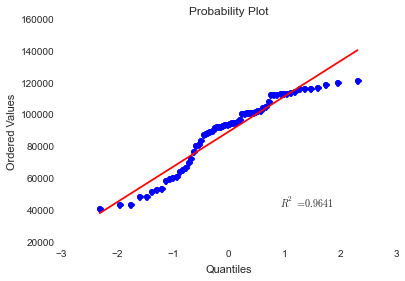

In [33]:
P90 = income['P90']
stats.probplot(P90, dist="norm", plot=pylab)
pylab.show()

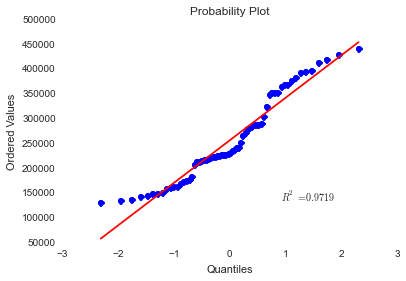

In [123]:
P99 = income['P99']
stats.probplot(P99, dist="norm", plot=pylab)
pylab.show()

# Motivation for feature selection

* Chose to look at the Real GDP per capita to see how well they could predict the a particular quintiles' income 

* Wanted to see if the metric of Real Capita per GDP increased, would the rate of increase be similar for all groups of people 

* Tried to split the income group from 1947-1980 and 1980 to 2012 due to flattening pattern observed

In [34]:
income47=income[:34]
income47

,Unnamed: 0,Year,Number.thousands,quintile1,quintile2,median,quintile3,quintile4,p95,P90,...,P99.9,P99.99,realGDP.M,GDP.Deflator,PopulationK,realGDPperCap,P95IRSvsCensus,personsPerFamily,realGDPperFamily,mean.median
0,35,1947,37237,14243,22984,26764.142878,31166,44223,72583,41477,...,479022,1584506,2034673.76,12.90,144126,14117.323879,0.746346,3.870505,54641.174675,2.041581
1,36,1948,38624,13779,22655,26177.632437,30248,42196,68714,43459,...,504131,1687123,2119101.80,13.63,146631,14451.938244,0.857336,3.796370,54864.906707,2.095870
2,37,1949,39303,13007,22221,25809.279668,29977,42361,67996,43923,...,467824,1539131,2107550.70,13.62,149188,14126.806282,0.867272,3.795843,53623.132473,2.077669
3,38,1950,39929,13829,23779,27432.353399,31647,43986,71728,48465,...,565506,1582089,2291213.19,13.75,151684,15105.173951,0.851606,3.798843,57382.183515,2.091770
4,39,1951,40578,15070,24569,28258.044324,32501,44376,69547,48655,...,530408,1780264,2475820.77,14.68,154287,16046.851126,0.891009,3.802233,61013.862676,2.159168
5,40,1952,40832,15557,25165,29270.592580,34046,46049,71646,51928,...,497284,1559300,2576630.37,15.00,156954,16416.465324,0.911677,3.843897,63103.200883,2.155857
6,41,1953,41202,16100,27322,31649.747013,36663,49376,76788,53287,...,465173,1400826,2697601.89,15.19,159565,16905.979940,0.870813,3.872749,65472.615143,2.068662
7,42,1954,41951,15010,26402,30719.054087,35742,48969,77601,53441,...,519497,1652847,2682375.44,15.35,162391,16518.009994,0.883313,3.870969,63940.696549,2.081467
8,43,1955,42889,16643,28325,32842.721035,38081,51577,79467,58502,...,572363,1892250,2873493.64,15.57,165275,17386.138165,0.950004,3.853552,66998.390851,2.039977
9,44,1956,43497,17989,30274,34868.812914,40161,54454,84396,60261,...,585061,1826274,2934714.47,16.10,168221,17445.584326,0.918290,3.867416,67469.334458,1.934948


In [35]:
income80=income[33:]
income80

,Unnamed: 0,Year,Number.thousands,quintile1,quintile2,median,quintile3,quintile4,p95,P90,...,P99.9,P99.99,realGDP.M,GDP.Deflator,PopulationK,realGDPperCap,P95IRSvsCensus,personsPerFamily,realGDPperFamily,mean.median
33,68,1980,60309,27592,46455,55285.682821,65795,92325,145917,94057,...,731318,2774744,6766214.34,44.49,227726,29712.085953,0.823783,3.775987,112192.450310,2.029322
34,69,1981,61019,26683,45420,54259.367670,64819,91567,145325,92777,...,735352,2880738,6941791.06,48.66,230008,30180.651074,0.814712,3.769449,113764.420791,2.096678
35,70,1982,61393,26042,44599,53364.594508,63853,91615,149211,91836,...,773150,3460786,6809163.43,51.63,232218,29322.288833,0.780928,3.782483,110911.069148,2.078364
36,71,1983,62015,25931,44414,53556.517194,64581,92345,151977,92419,...,848233,3724338,7124613.47,53.66,234333,30403.797324,0.782125,3.778650,114885.318686,2.145123
37,72,1984,62706,26469,46042,55412.877763,66691,95904,157023,94849,...,879457,4336427,7641787.72,55.57,236394,32326.488420,0.784560,3.769878,121866.933046,2.199253
38,73,1985,63558,27035,46573,56053.553607,67464,98146,160694,97106,...,1010074,4634247,7965743.57,57.35,238506,33398.504007,0.794162,3.752572,125330.306125,2.235903
39,74,1986,64491,27983,48171,58150.733942,70198,101080,166701,101086,...,1292177,6999670,8245490.21,58.51,240683,34258.714424,0.818417,3.732040,127854.897020,2.198681
40,75,1987,65204,28225,48689,58859.299231,71154,103113,168115,100982,...,965452,3922394,8530907.39,59.94,242843,35129.310330,0.777254,3.724357,130834.106933,2.222828
41,76,1988,65837,28166,48831,59213.690343,71804,104267,171586,102248,...,1250581,5794640,8889516.54,62.04,245061,36274.706905,0.782249,3.722238,135023.101734,2.280268
42,77,1989,66090,28612,50062,60430.726572,72947,106470,176937,102854,...,1155888,5000383,9216727.70,64.46,247387,37256.308882,0.768110,3.743184,139457.202079,2.307720


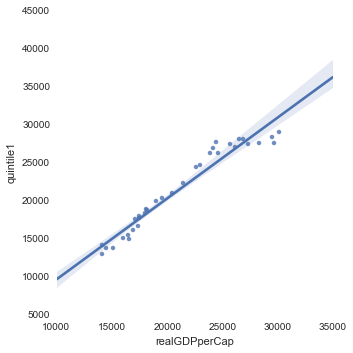

In [36]:
sns.lmplot("realGDPperCap", 'quintile1', income47);

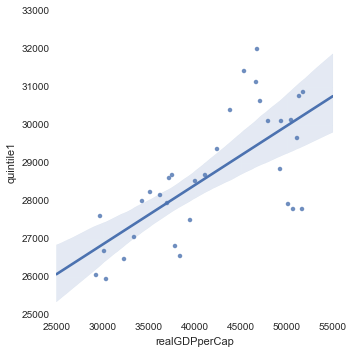

In [37]:
sns.lmplot("realGDPperCap", 'quintile1', income80);

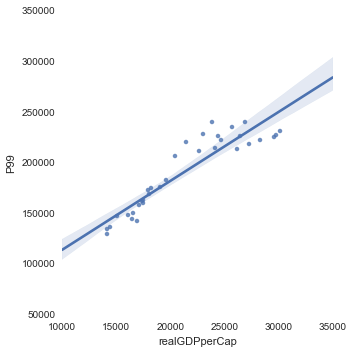

In [38]:
sns.lmplot("realGDPperCap", 'P99', income47);

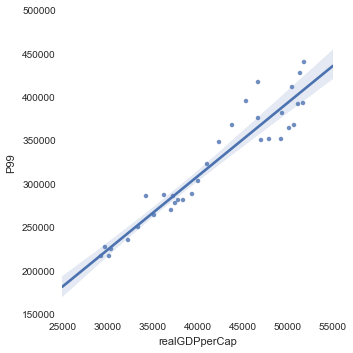

In [39]:
sns.lmplot("realGDPperCap", 'P99', income80);

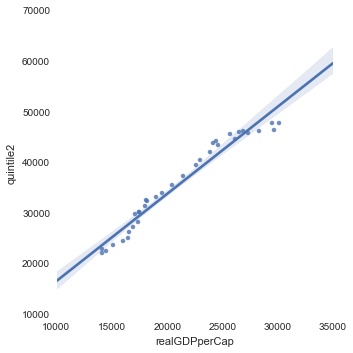

In [40]:
sns.lmplot("realGDPperCap", 'quintile2', income47);

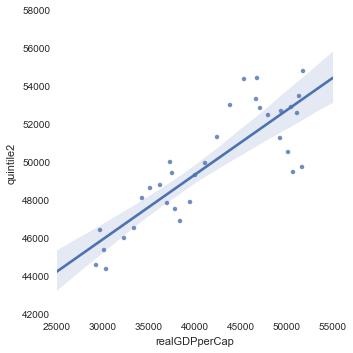

In [41]:
sns.lmplot("realGDPperCap", 'quintile2', income80);

# Checking whether the preconditions for linear regression have been met
* There is strong multicollinearity with the variables so linear regression will not work

In [42]:
from statsmodels.formula.api import ols

results = ols('quintile1 ~ realGDPperCap', income).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              quintile1   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     149.9
Date:                Wed, 01 Apr 2015   Prob (F-statistic):           2.02e-18
Time:                        17:31:27   Log-Likelihood:                -620.85
No. Observations:                  66   AIC:                             1246.
Df Residuals:                      64   BIC:                             1250.
Df Model:                           1                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      1.337e+04   1021.606     13.089      0.000      1.13e+04  1.54e+04
realGDPperCap     0.3726      0.030     12.

In [43]:
results = ols('quintile1 ~ realGDPperCap', income47).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              quintile1   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     555.9
Date:                Wed, 01 Apr 2015   Prob (F-statistic):           8.52e-22
Time:                        17:31:37   Log-Likelihood:                -290.91
No. Observations:                  34   AIC:                             585.8
Df Residuals:                      32   BIC:                             588.9
Df Model:                           1                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      -969.3479    982.012     -0.987      0.331     -2969.641  1030.945
realGDPperCap     1.0643      0.045     23.

In [51]:
results = ols('quintile1 ~ realGDPperCap', income80).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              quintile1   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     30.74
Date:                Wed, 01 Apr 2015   Prob (F-statistic):           4.51e-06
Time:                        17:41:21   Log-Likelihood:                -279.65
No. Observations:                  33   AIC:                             563.3
Df Residuals:                      31   BIC:                             566.3
Df Model:                           1                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      2.216e+04   1193.038     18.576      0.000      1.97e+04  2.46e+04
realGDPperCap     0.1563      0.028      5.

In [52]:
results = ols('quintile2 ~ realGDPperCap', income).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              quintile2   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     246.5
Date:                Wed, 01 Apr 2015   Prob (F-statistic):           1.25e-23
Time:                        17:42:14   Log-Likelihood:                -646.90
No. Observations:                  66   AIC:                             1298.
Df Residuals:                      64   BIC:                             1302.
Df Model:                           1                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      2.057e+04   1516.088     13.570      0.000      1.75e+04  2.36e+04
realGDPperCap     0.7092      0.045     15.

In [53]:
results = ols('quintile2 ~ realGDPperCap', income47).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              quintile2   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     698.0
Date:                Wed, 01 Apr 2015   Prob (F-statistic):           2.66e-23
Time:                        17:42:24   Log-Likelihood:                -303.34
No. Observations:                  34   AIC:                             610.7
Df Residuals:                      32   BIC:                             613.7
Df Model:                           1                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      -493.0104   1415.387     -0.348      0.730     -3376.059  2390.038
realGDPperCap     1.7188      0.065     26.

In [54]:
results = ols('quintile2 ~ realGDPperCap', income80).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              quintile2   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     79.72
Date:                Wed, 01 Apr 2015   Prob (F-statistic):           4.47e-10
Time:                        17:42:36   Log-Likelihood:                -289.61
No. Observations:                  33   AIC:                             583.2
Df Residuals:                      31   BIC:                             586.2
Df Model:                           1                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      3.576e+04   1613.543     22.162      0.000      3.25e+04  3.91e+04
realGDPperCap     0.3403      0.038      8.

In [47]:
from statsmodels.formula.api import ols

results = ols('P99 ~ realGDPperCap', income).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    P99   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1158.
Date:                Wed, 01 Apr 2015   Prob (F-statistic):           1.03e-42
Time:                        17:33:15   Log-Likelihood:                -745.99
No. Observations:                  66   AIC:                             1496.
Df Residuals:                      64   BIC:                             1500.
Df Model:                           1                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      4.043e+04   6803.701      5.942      0.000      2.68e+04   5.4e+04
realGDPperCap     6.9001      0.203     34.

In [48]:
from statsmodels.formula.api import ols

results = ols('P99 ~ realGDPperCap', income47).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    P99   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     186.4
Date:                Wed, 01 Apr 2015   Prob (F-statistic):           6.78e-15
Time:                        17:33:20   Log-Likelihood:                -372.60
No. Observations:                  34   AIC:                             749.2
Df Residuals:                      32   BIC:                             752.3
Df Model:                           1                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      4.598e+04   1.09e+04      4.236      0.000      2.39e+04  6.81e+04
realGDPperCap     6.8116      0.499     13.

In [50]:
from statsmodels.formula.api import ols

results = ols('P99 ~ realGDPperCap', income80).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    P99   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     296.1
Date:                Wed, 01 Apr 2015   Prob (F-statistic):           2.05e-17
Time:                        17:33:46   Log-Likelihood:                -374.08
No. Observations:                  33   AIC:                             752.2
Df Residuals:                      31   BIC:                             755.1
Df Model:                           1                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      -2.98e+04   2.09e+04     -1.428      0.163     -7.24e+04  1.28e+04
realGDPperCap     8.4813      0.493     17.

# Evaluation of model's strengths and weaknesses

* Strengths
    * By plotting the data, you can definitely see a flattening of income
    * By splitting data into segments, you can see the increase in variance for lower quintiles from 1980 onwards
    
* Weaknesses
    * If you were looking at the data from 1947 to 1980s, the data seems to show a particular trend. However there was a shift in the 1980s that completely changed the rate of increase for the the bottom 3 quintiles. Linear Regression may not be the best. However, using a polynomial model might have led to overfitting
    * Too few data points
    * Strong multicollinearity with most of the data
    * Even though it looks like the Real GDP rises linearly, the economy is a complex system and there are many other external factors that could be used for predictions
   